# Banks Stocks - Finance Data Project 

This notebook is from an exercise from the Python for Data Science and Machine Learning Bootcamp course (https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/). It contains some different approaches from the exercise.
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In this project we will explore the stock information for the following banks:

*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

___

## Data and Setup

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

In [2]:
from IPython.core.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="(show | hide) code"></form>''')

#### importing data

In [3]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [4]:
BAC = data.DataReader('BAC', 'yahoo', start, end) # Bank of America

C = data.DataReader("C", 'yahoo', start, end) # CitiGroup

GS = data.DataReader("GS", 'yahoo', start, end) # Goldman Sachs

JPM = data.DataReader("JPM", 'yahoo', start, end) # JPMorgan Chase

MS = data.DataReader("MS", 'yahoo', start, end) # Morgan Stanley

WFC = data.DataReader("WFC", 'yahoo', start, end) # Wells Fargo

#### formatting multilevel index

In [5]:
tickers = {'BAC':BAC, 'C':C, 'GS':GS, 'JPM':JPM, 'MS':MS, 'WFC':WFC}

In [6]:
bank_stocks = pd.concat(tickers, axis=1, keys=tickers.keys())

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

#### Checking data

In [8]:
bank_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (BAC, High)       2517 non-null   float64
 1   (BAC, Low)        2517 non-null   float64
 2   (BAC, Open)       2517 non-null   float64
 3   (BAC, Close)      2517 non-null   float64
 4   (BAC, Volume)     2517 non-null   float64
 5   (BAC, Adj Close)  2517 non-null   float64
 6   (C, High)         2517 non-null   float64
 7   (C, Low)          2517 non-null   float64
 8   (C, Open)         2517 non-null   float64
 9   (C, Close)        2517 non-null   float64
 10  (C, Volume)       2517 non-null   float64
 11  (C, Adj Close)    2517 non-null   float64
 12  (GS, High)        2517 non-null   float64
 13  (GS, Low)         2517 non-null   float64
 14  (GS, Open)        2517 non-null   float64
 15  (GS, Close)       2517 non-null   float64
 16  (GS, Volume)      2517 n

In [9]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.280807  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.916729  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.960411  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.909451  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.931290  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.631054  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  36.656166  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  36.756695  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  36.794384  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.183868  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.613142  
2006-01-04   31.799999  31.530001  10870000.0  20.374050  
2006-01-05   31.500000  31.495001  10158000.0  20.351437  
2006-01-06   31.580000  31.680000   8403800.0  20.470978  
2006-01-09   31.674999  31.674999   5619600.0  20.467749  

[5 rows x 36 columns]

## Basic Analysis


**max Close price for each bank's stock throughout the time period**

In [10]:
bank_stocks.xs('Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

**new DataFrame containing the returns for each bank's stock... returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [11]:
returns = pd.DataFrame()

In [12]:
for column in bank_stocks.xs('Close', axis=1, level=1):
    returns[f'{column} Return'] = bank_stocks.xs('Close', axis=1, level=1)[column].pct_change()

In [13]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


**pairplot of the returns dataframe**

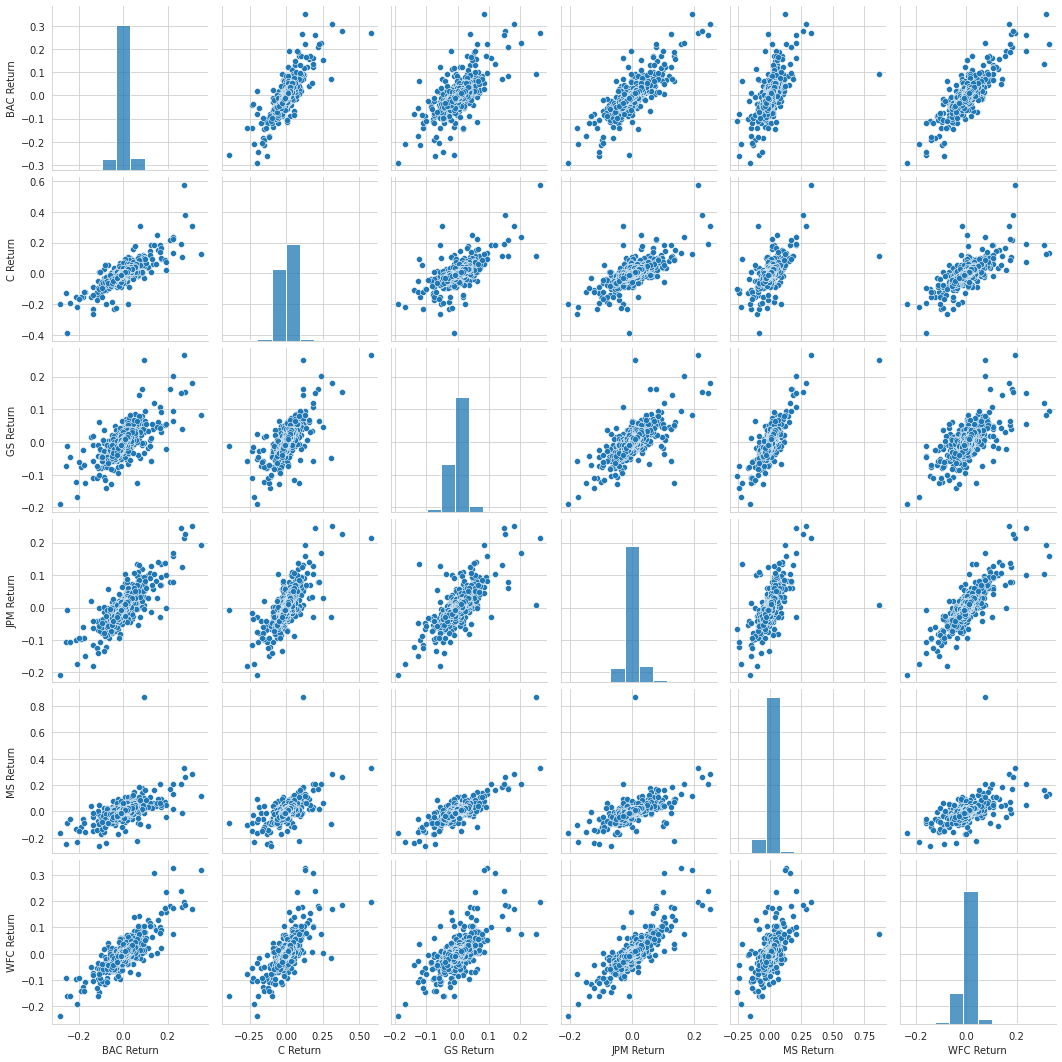

In [14]:
g = sns.pairplot(returns, diag_kws = {'bins':10})
for ax in g.axes.flat:
    _ = plt.setp(ax.get_yticklabels(), visible=True)
    _ = plt.setp(ax.get_xticklabels(), visible=True)


**what dates each bank stock had the best and worst single day returns**

In [15]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [16]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

**the standard deviation of the returns**

In [17]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

**the standard deviation of the returns for 2015**

In [18]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

**distplot of the 2015 returns for Morgan Stanley**

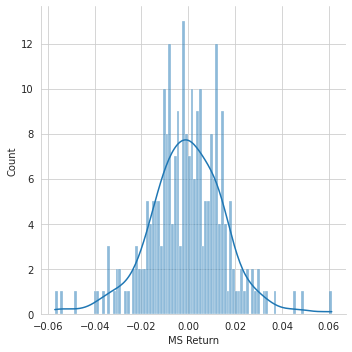

In [19]:
sns.displot(returns.xs('MS Return', axis=1).loc['2015-01-01':'2015-12-31'], bins=100, kde=True)

**distplot of the 2008 returns for CitiGroup**

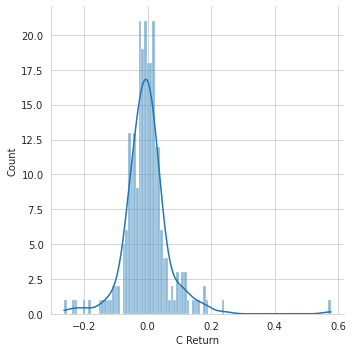

In [20]:
sns.displot(returns.xs('C Return', axis=1).loc['2008-01-01':'2008-12-31'], bins=100, kde=True)

____
## Visualizations


**line plot showing Close price for each bank for the entire index of time**

<AxesSubplot:xlabel='Date'>

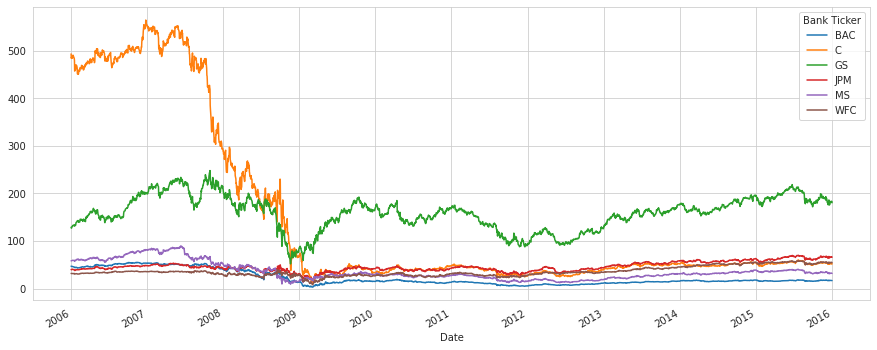

In [21]:
bank_stocks.xs('Close', axis=1, level=1).plot(figsize=(15, 6))

**line plot showing Close price for each bank for the entire index of time**

In [22]:
bank_stocks.xs('Close', axis=1, level=1).iplot()

**the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

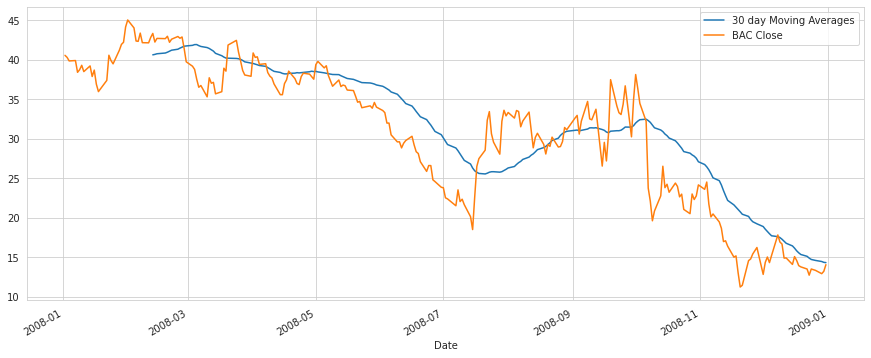

In [23]:
BAC['Close'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label = '30 day Moving Averages', figsize=(15,6))
BAC['Close'].loc['2008-01-01':'2008-12-31'].plot(label = 'BAC Close')
plt.legend()

**heatmap of the correlation between the stocks Close Price**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

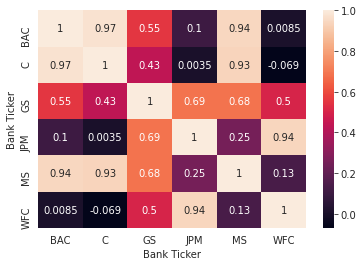

In [24]:
sns.heatmap(bank_stocks.xs('Close', axis=1, level=1).corr(), annot=True)

**clustermap of the correlation between the stocks Close Price**

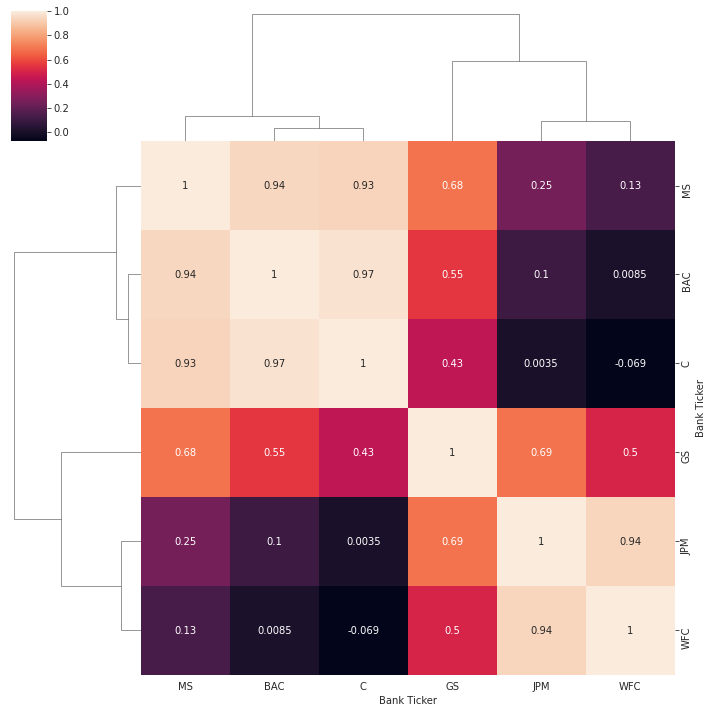

In [25]:
sns.clustermap(bank_stocks.xs('Close', axis=1, level=1).corr(), annot=True)

**heatmap of the correlation between the stocks Close Price**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

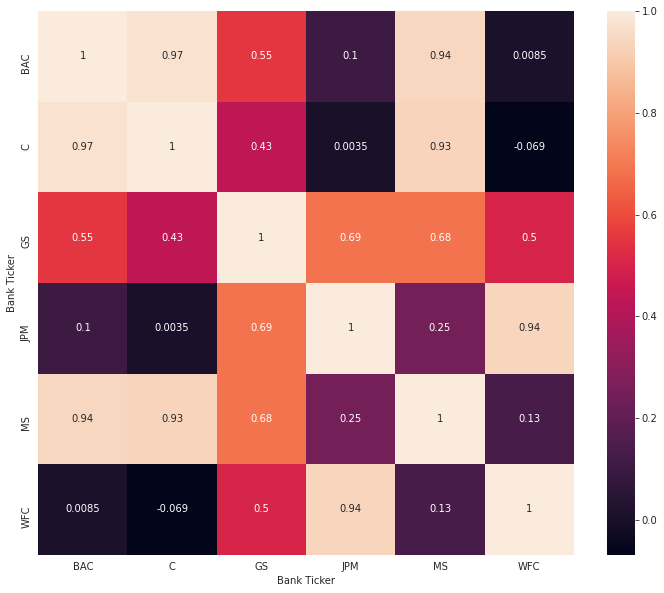

In [32]:
plt.figure(figsize=(12,10))
sns.heatmap(bank_stocks.xs('Close', axis=1, level='Stock Info').corr(), annot=True)

In [34]:
bank_stocks.xs('Close', axis=1, level='Stock Info').corr().iplot(kind='heatmap', colorscale='rdylbu')

**candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016**

In [36]:
BAC.loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

**Simple Moving Averages plot of Morgan Stanley for the year 2015**

In [37]:
MS['Close'].loc['2015-01-01':'2015-12-31'].ta_plot(study='sma', periods=[10,20,30])

**Bollinger Band Plot for Bank of America for the year 2015**

In [38]:
BAC['Close'].loc['2015-01-01':'2015-12-31'].ta_plot(study='boll')